In [58]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np


In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.compose import ColumnTransformer


In [3]:
path = '/Users/vladislavpleshko/Downloads/Employers_data.csv'
df = pd.read_csv(path)
df


,Employee_ID,Name,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
0,1,Merle Ingram,24,Female,Engineering,Engineer,1,Master,Austin,90000
1,2,John Mayes,56,Male,Sales,Executive,33,Master,Seattle,195000
2,3,Carlos Wille,21,Male,Engineering,Intern,1,Bachelor,New York,35000
3,4,Michael Bryant,30,Male,Finance,Analyst,9,Bachelor,New York,75000
4,5,Paula Douglas,25,Female,HR,Analyst,2,Master,Seattle,70000
...,...,...,...,...,...,...,...,...,...,...
9995,9996,Thomas Rossin,51,Male,Sales,Executive,28,Master,Austin,185000
9996,9997,Christie King,36,Female,Sales,Executive,9,PhD,San Francisco,165000
9997,9998,Alfred Keller,57,Male,Sales,Executive,30,PhD,New York,200000
9998,9999,Margaret Gomez,37,Female,Engineering,Manager,14,Master,New York,135000


In [4]:
df.describe(include='all')


,Employee_ID,Name,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
count,10000.00000,10000,10000.000000,10000,10000,10000,10000.000000,10000,10000,10000.000000
unique,NaN,9868,NaN,2,6,5,NaN,3,5,NaN
top,NaN,James Smith,NaN,Male,Product,Manager,NaN,Master,Austin,NaN
freq,NaN,5,NaN,5108,1724,3325,NaN,4930,2034,NaN
mean,5000.50000,NaN,35.455900,NaN,NaN,NaN,12.370900,NaN,NaN,115381.500000
std,2886.89568,NaN,10.000213,NaN,NaN,NaN,9.148951,NaN,NaN,46066.139047
min,1.00000,NaN,21.000000,NaN,NaN,NaN,0.000000,NaN,NaN,25000.000000
25%,2500.75000,NaN,27.000000,NaN,NaN,NaN,5.000000,NaN,NaN,70000.000000
50%,5000.50000,NaN,34.000000,NaN,NaN,NaN,10.000000,NaN,NaN,120000.000000
75%,7500.25000,NaN,43.000000,NaN,NaN,NaN,19.000000,NaN,NaN,150000.000000


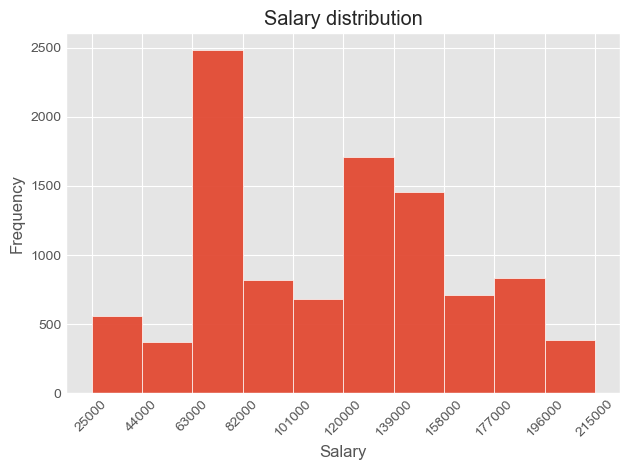

In [ ]:
def draw_hist(dataframe, bins):
    data = dataframe.values
    counts, bin_edges = np.histogram(data, bins=bins)
    plt.hist(data,
             bins=bin_edges,
             edgecolor='white',
             alpha=0.95)
    plt.xticks(bin_edges, rotation=45)
    plt.title(f'{dataframe.name} distribution')
    plt.ylabel('Frequency')
    plt.xlabel(dataframe.name)
    plt.tight_layout()
    plt.grid(True)
    plt.show()
draw_hist(dataframe=df['Salary'], bins=10)


In [5]:
df.dtypes


Employee_ID          int64
Name                object
Age                  int64
Gender              object
Department          object
Job_Title           object
Experience_Years     int64
Education_Level     object
Location            object
Salary               int64
dtype: object

In [6]:
print(df.isna().any())
print(df.isna().any())


Employee_ID         False
Name                False
Age                 False
Gender              False
Department          False
Job_Title           False
Experience_Years    False
Education_Level     False
Location            False
Salary              False
dtype: bool
Employee_ID         False
Name                False
Age                 False
Gender              False
Department          False
Job_Title           False
Experience_Years    False
Education_Level     False
Location            False
Salary              False
dtype: bool


In [8]:
X = df[['Age', 'Gender', 'Department','Job_Title','Experience_Years', 'Education_Level', 'Location']]
Y = df['Salary']

print(f'X = {X.shape}, Y = {Y.shape}')

X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    train_size=0.8,
                                                    random_state=25,
                                                    shuffle=True)

for name, arr in zip(["X_train", "X_test", "y_train", "y_test"], [X_train, X_test, y_train, y_test]):
    print(f'{name} = {arr.shape}')


X = (10000, 7), Y = (10000,)
X_train = (8000, 7)
X_test = (2000, 7)
y_train = (8000,)
y_test = (2000,)


In [9]:
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
print(f'Cat = {cat_cols}\n num = {num_cols}')


Cat = Index(['Gender', 'Department', 'Job_Title', 'Education_Level', 'Location'], dtype='object')
 num = Index(['Age', 'Experience_Years'], dtype='object')


In [10]:
numeric_transformer = StandardScaler()
cat_transformer = Pipeline(steps=[
    ('encoder', OrdinalEncoder()),
    ('scaler', StandardScaler())
])

preproccesor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', cat_transformer, cat_cols)
])


In [11]:
preproccesor


ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['Age', 'Experience_Years'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('encoder', OrdinalEncoder()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Gender', 'Department', 'Job_Title', 'Education_Level', 'Location'], dtype='object'))])

In [12]:
models = {
        "LinearRegression": (
            LinearRegression(),
            {"regressor__fit_intercept": [True, False]}
        ),
        "Ridge": (
            Ridge(),
            {"regressor__alpha": [0.1, 1.0, 10.0], "regressor__fit_intercept": [True, False]}
        ),
        "Lasso": (
            Lasso(max_iter=5000),
            {"regressor__alpha": [0.001, 0.01, 0.1, 1.0]}
        ),
        "ElasticNet": (
            ElasticNet(max_iter=5000),
            {"regressor__alpha": [0.001, 0.01, 0.1, 1.0],
             "regressor__l1_ratio": [0.2, 0.5, 0.8]}
        ),
        "SVR": (
            SVR(),
            {"regressor__kernel": ["linear", "rbf"],
             "regressor__C": [0.1, 1, 10]}
        ),
        "KNN": (
            KNeighborsRegressor(),
            {"regressor__n_neighbors": [3, 5, 7],
             "regressor__weights": ["uniform", "distance"]}
        ),
        "DecisionTree": (
            DecisionTreeRegressor(random_state=42),
            {"regressor__max_depth": [3, 5, 10, None]}
        ),
        "RandomForest": (
            RandomForestRegressor(random_state=42),
            {"regressor__n_estimators": [50, 100],
             "regressor__max_depth": [None, 5, 10]}
        )
    }


In [ ]:
def reg_run(X_train, X_test, y_train, y_test):

    results = []

    for name, (model, params) in models.items():
        pipeline = Pipeline([
            ('preproccesor', preproccesor),
            ('regressor', model)
        ])

        grid = GridSearchCV(pipeline, param_grid=params, cv=5, scoring='r2', n_jobs=-1)
        grid.fit(X_train, y_train)

        y_pred_test = grid.predict(X_test)
        y_pred_train = grid.predict(X_train)

        def calculate_metrics(var, ground_truth, predictions):
            R2 = r2_score(ground_truth, predictions)
            MAE = mean_absolute_error(ground_truth, predictions)
            RMSE = np.sqrt(mean_squared_error(ground_truth, predictions))
            REL_MAE = MAE / np.mean(predictions) * 100

            result = {
                'model': name,
                'dataset_var': var,
                'R2': R2,
                'MAE': MAE,
                'RMSE': RMSE,
                'REL_MAE': REL_MAE
            }
            if var == 'test':
                result['best_params'] = grid.best_params_
            return result

        results.append(calculate_metrics(var='train', ground_truth=y_train, predictions=y_pred_train))
        results.append(calculate_metrics(var='test', ground_truth=y_test, predictions=y_pred_test))

    # df with results
    df_results = pd.DataFrame(results)
    return df_results


In [101]:
regressions = reg_run(X_train, X_test, y_train, y_test)


               model dataset_var        R2           MAE          RMSE  \
0   LinearRegression       train  0.898959  11548.164013  14681.400828   
1   LinearRegression        test  0.894217  11623.727736  14820.048070   
2              Ridge       train  0.898959  11548.837030  14681.414625   
3              Ridge        test  0.894215  11624.589276  14820.244979   
4              Lasso       train  0.898959  11549.190916  14681.433460   
5              Lasso        test  0.894213  11625.011066  14820.338372   
6         ElasticNet       train  0.898917  11561.591227  14684.471212   
7         ElasticNet        test  0.894136  11641.027895  14825.750738   
8                SVR       train  0.869069  12619.248627  16712.495483   
9                SVR        test  0.865943  12573.693003  16683.526984   
10               KNN       train  0.992552   3151.375000   3986.147890   
11               KNN        test  0.988386   3866.000000   4910.498956   
12      DecisionTree       train  0.98

In [ ]:
regressions[regressions['dataset_var'] == 'test'].sort_values(by=['R2'], ascending=False)


,model,dataset_var,R2,MAE,RMSE,REL_MAE,best_params
15,RandomForest,test,0.989973,3568.201176,4562.728414,3.097253,"{'regressor__max_depth': 5, 'regressor__n_esti..."
13,DecisionTree,test,0.988913,3793.094945,4797.957316,3.292932,{'regressor__max_depth': 5}
11,KNN,test,0.988386,3866.000000,4910.498956,3.350000,"{'regressor__n_neighbors': 5, 'regressor__weig..."
1,LinearRegression,test,0.894217,11623.727736,14820.048070,10.099584,{'regressor__fit_intercept': True}
3,Ridge,test,0.894215,11624.589276,14820.244979,10.100362,"{'regressor__alpha': 0.1, 'regressor__fit_inte..."
5,Lasso,test,0.894213,11625.011066,14820.338372,10.100746,{'regressor__alpha': 1.0}
7,ElasticNet,test,0.894136,11641.027895,14825.750738,10.115056,"{'regressor__alpha': 0.001, 'regressor__l1_rat..."
9,SVR,test,0.865943,12573.693003,16683.526984,11.122090,"{'regressor__C': 10, 'regressor__kernel': 'lin..."


In [ ]:
regressions.sort_values(by=['model'])


,model,dataset_var,R2,MAE,RMSE,REL_MAE,best_params
12,DecisionTree,train,0.989886,3729.502337,4644.873784,3.229828,NaN
13,DecisionTree,test,0.988913,3793.094945,4797.957316,3.292932,{'regressor__max_depth': 5}
6,ElasticNet,train,0.898917,11561.591227,14684.471212,10.012582,NaN
7,ElasticNet,test,0.894136,11641.027895,14825.750738,10.115056,"{'regressor__alpha': 0.001, 'regressor__l1_rat..."
10,KNN,train,0.992552,3151.375000,3986.147890,2.727890,NaN
11,KNN,test,0.988386,3866.000000,4910.498956,3.350000,"{'regressor__n_neighbors': 5, 'regressor__weig..."
4,Lasso,train,0.898959,11549.190916,14681.433460,10.001843,NaN
5,Lasso,test,0.894213,11625.011066,14820.338372,10.100746,{'regressor__alpha': 1.0}
0,LinearRegression,train,0.898959,11548.164013,14681.400828,10.000954,NaN
1,LinearRegression,test,0.894217,11623.727736,14820.048070,10.099584,{'regressor__fit_intercept': True}


In [ ]:
pivot = regressions.pivot(index='model', columns='dataset_var', values='R2')
pivot['R2_diff'] = pivot['train'] - pivot['test']
pivot


dataset_var,test,train,R2_diff
model,,,
DecisionTree,0.988913,0.989886,0.000974
ElasticNet,0.894136,0.898917,0.004781
KNN,0.988386,0.992552,0.004165
Lasso,0.894213,0.898959,0.004746
LinearRegression,0.894217,0.898959,0.004742
RandomForest,0.989973,0.990828,0.000854
Ridge,0.894215,0.898959,0.004745
SVR,0.865943,0.869069,0.003126


In [ ]:
def output_best():
    model = regressions[(regressions['dataset_var'] == 'test')].sort_values(by='R2', ascending=False).iloc[0]['model']
    params = regressions[(regressions['dataset_var'] == 'test')].sort_values(by='R2', ascending=False).iloc[0]['best_params']
    return model, params
output_best()


('RandomForest', {'regressor__max_depth': 5, 'regressor__n_estimators': 100})

In [ ]:
df.columns


Index(['Employee_ID', 'Name', 'Age', 'Gender', 'Department', 'Job_Title',
       'Experience_Years', 'Education_Level', 'Location', 'Salary'],
      dtype='object')

In [ ]:
print(df['Department'].unique().tolist())
print(df['Job_Title'].unique().tolist())
print(df['Experience_Years'].unique().tolist())


['Engineering', 'Sales', 'Finance', 'HR', 'Marketing', 'Product']
['Engineer', 'Executive', 'Intern', 'Analyst', 'Manager']
[1, 33, 9, 2, 8, 24, 16, 0, 21, 13, 32, 30, 26, 3, 20, 5, 19, 7, 12, 4, 14, 22, 15, 18, 11, 23, 10, 6, 31, 29, 25, 28, 17, 27, 36, 35, 34, 37]
